In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('shipping.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [4]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
# categorical columns 
df[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [6]:
# Value Counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value count kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64



In [7]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
df.duplicated().any()

False

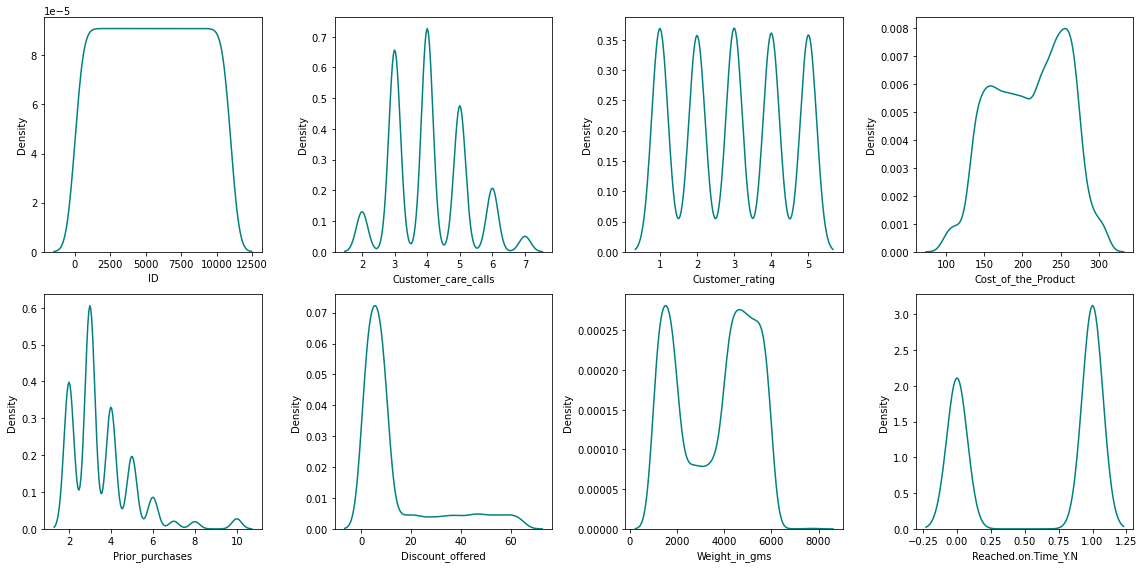

In [9]:
# Kdeplot sebelum transformasi
features = nums
plt.figure(figsize=(16, 8))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='teal')
    plt.xlabel(features[i])
    plt.tight_layout()

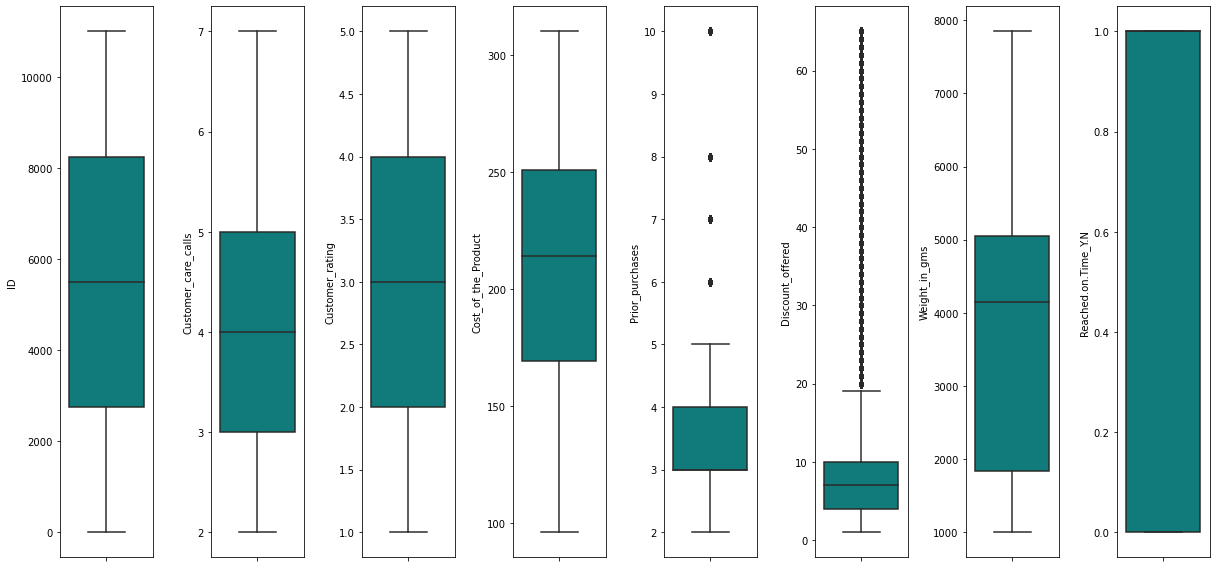

In [10]:
# Boxplot sebelum transformasi
features = nums
plt.figure(figsize=(17, 8))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='darkcyan', orient='v')
    plt.tight_layout()

In [11]:
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
     

In [12]:
df['Cost_of_the_Product_tr'] = quantile.fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['Discount_offered_tr'] = quantile.fit_transform(df['Discount_offered'].values.reshape(len(df), 1))
df['Customer_care_calls_tr'] = quantile.fit_transform(df['Customer_care_calls'].values.reshape(len(df), 1))
df['Weight_in_gms_tr'] = quantile.fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))
df['Prior_purchases_tr'] = quantile.fit_transform(df['Prior_purchases'].values.reshape(len(df), 1))

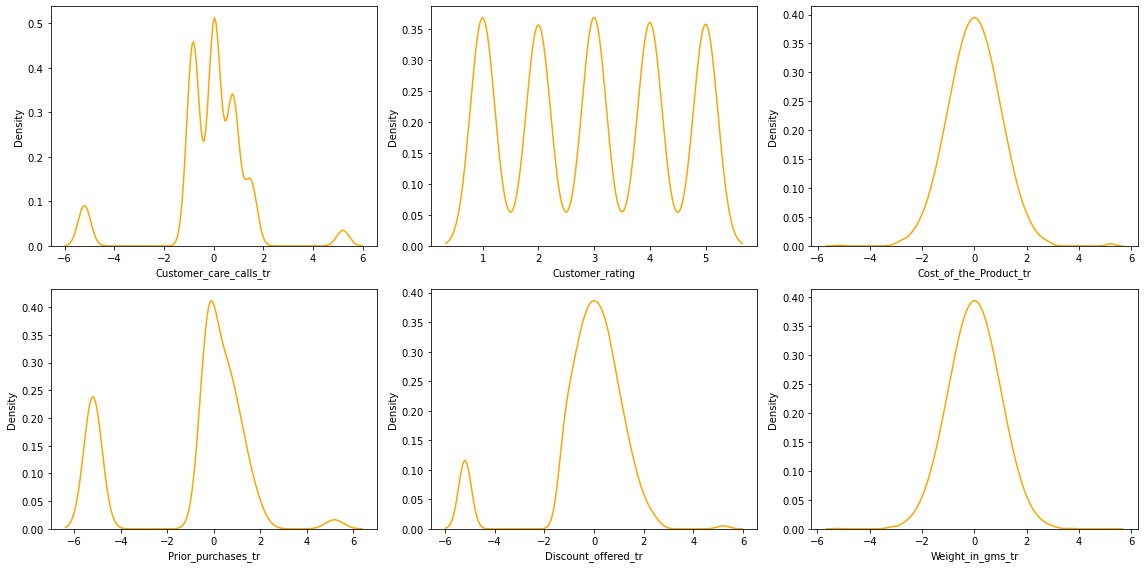

In [13]:
nums_trans1 = ['Customer_care_calls_tr', 'Customer_rating', 'Cost_of_the_Product_tr', 'Prior_purchases_tr', 'Discount_offered_tr', 'Weight_in_gms_tr']
features1 = nums_trans1
plt.figure(figsize=(16, 8))
for i in range(0, len(features1)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features1[i]], color='orange')
    plt.xlabel(features1[i])
    plt.tight_layout()

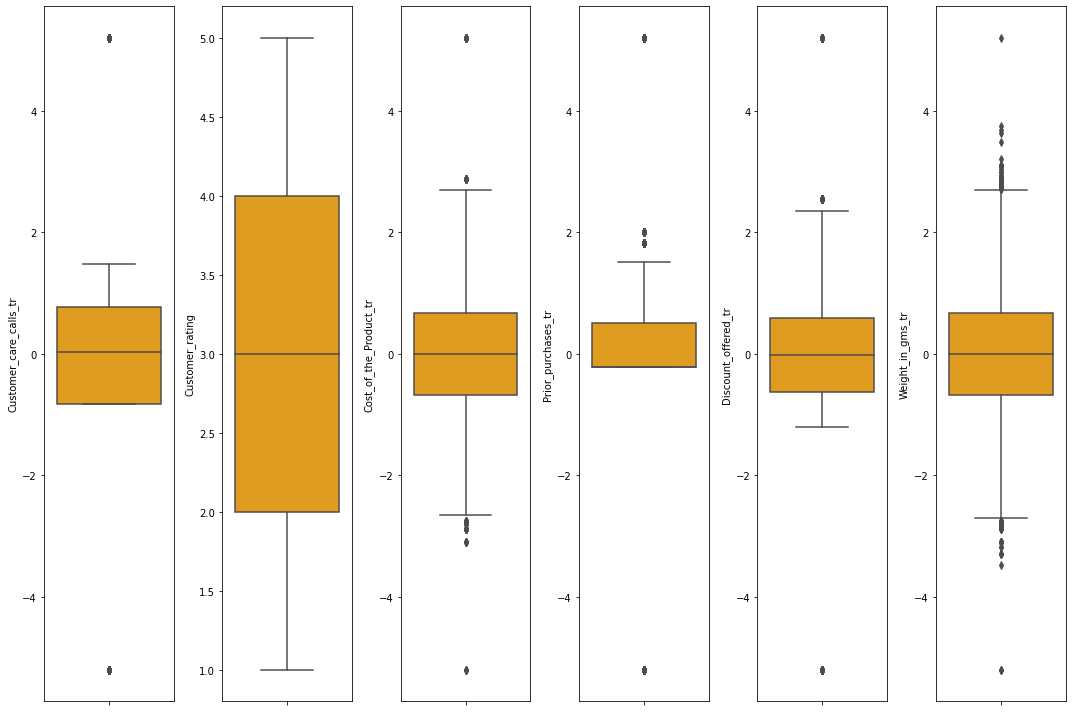

In [14]:
features1 = nums_trans1
plt.figure(figsize=(15, 10))
for i in range(0, len(features1)):
    plt.subplot(1, len(features1), i+1)
    sns.boxplot(y=df[features1[i]], color='orange', orient='v')
    plt.tight_layout()

In [15]:
#Log Transformasi digunakan ke feature yang memiliki skew positif yang besar
df['Discount_offered_log'] = np.log(df['Discount_offered'])
df['Prior_purchases_log'] = np.log(df['Prior_purchases'])
     

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['cust_call_std'] = StandardScaler().fit_transform(df['Customer_care_calls'].values.reshape(len(df), 1))
df['cust_rating_std'] = StandardScaler().fit_transform(df['Customer_rating'].values.reshape(len(df), 1))
df['prior_purchase_std'] = StandardScaler().fit_transform(df['Prior_purchases_log'].values.reshape(len(df), 1))
df['product_cost_std'] = StandardScaler().fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['discount_std'] = StandardScaler().fit_transform(df['Discount_offered_log'].values.reshape(len(df), 1))
df['weight_std'] = StandardScaler().fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))

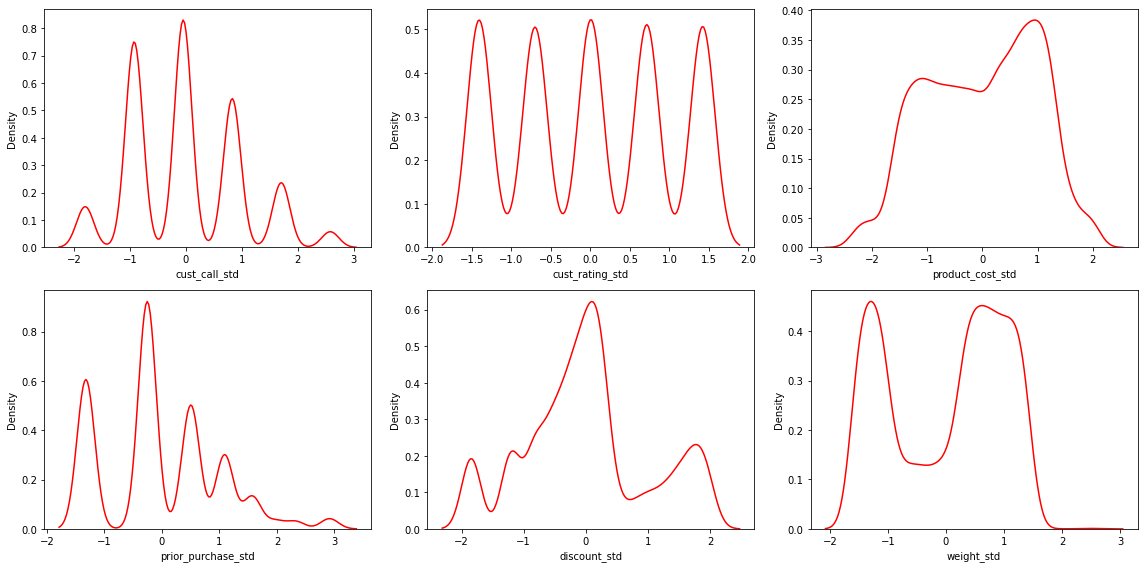

In [17]:
nums_trans2 = ['cust_call_std', 'cust_rating_std', 'product_cost_std', 'prior_purchase_std', 'discount_std', 'weight_std']
features2 = nums_trans2
plt.figure(figsize=(16, 8))
for i in range(0, len(features2)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features2[i]], color='red')
    plt.xlabel(features2[i])
    plt.tight_layout()

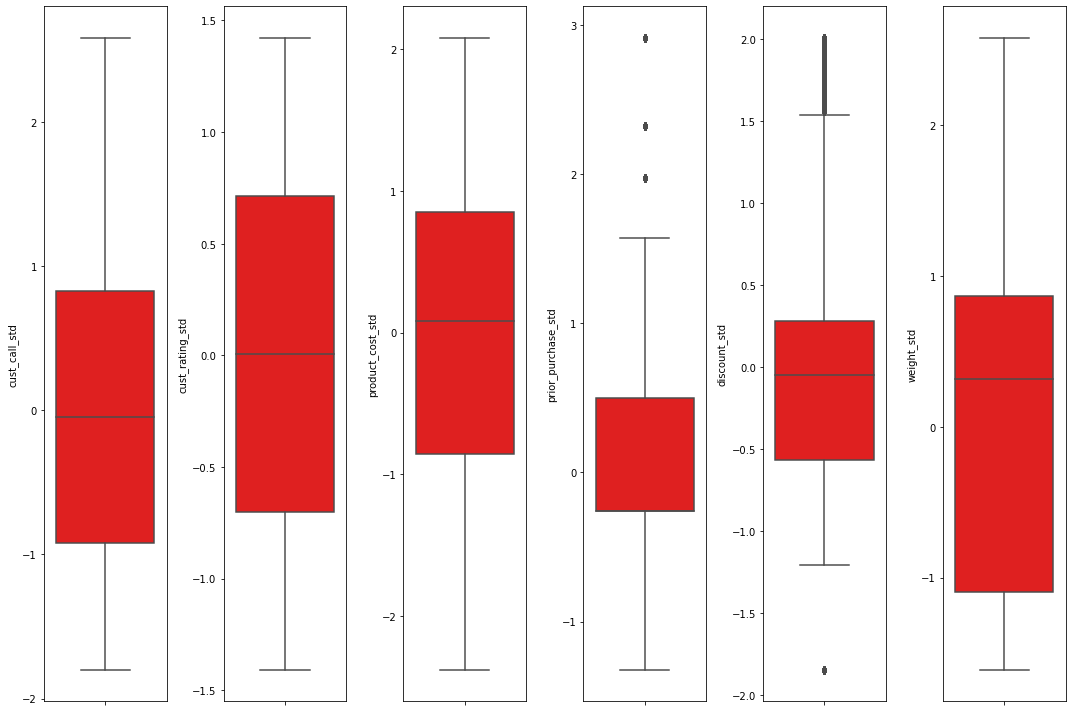

In [18]:
features2 = nums_trans2
plt.figure(figsize=(15, 10))
for i in range(0, len(features2)):
    plt.subplot(1, len(features2), i+1)
    sns.boxplot(y=df[features2[i]], color='red', orient='v')
    plt.tight_layout()
     

In [19]:
df_quantile = df.drop(columns=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Discount_offered_log','Weight_in_gms','Prior_purchases_log','ID','Prior_purchases','Discount_offered','product_cost_std','discount_std','cust_call_std','weight_std','prior_purchase_std','cust_rating_std'])
df_quantile.describe()

,Reached.on.Time_Y.N,Cost_of_the_Product_tr,Discount_offered_tr,Customer_care_calls_tr,Weight_in_gms_tr,Prior_purchases_tr
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.596691,0.002431,-0.240507,-0.116761,-0.000377,-0.876876
std,0.490584,1.016237,1.655656,1.639811,1.003136,2.540321
min,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,0.000000,-0.684763,-0.622621,-0.826698,-0.674431,-0.211070
50%,1.000000,-0.003764,-0.017565,0.031369,0.000000,-0.211070
75%,1.000000,0.678433,0.583496,0.771450,0.674837,0.506348
max,1.000000,5.199338,5.199338,5.199338,5.199338,5.199338


In [20]:
df_log = df.drop(columns=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Discount_offered_log','Weight_in_gms','Prior_purchases_log','ID','Prior_purchases','Discount_offered','Cost_of_the_Product_tr','Discount_offered_tr','Customer_care_calls_tr','Weight_in_gms_tr','Prior_purchases_tr'])
df_log.describe()

,Reached.on.Time_Y.N,cust_call_std,cust_rating_std,prior_purchase_std,product_cost_std,discount_std,weight_std
count,10999.000000,1.099900e+04,1.099900e+04,1.099900e+04,1.099900e+04,1.099900e+04,1.099900e+04
mean,0.596691,1.128796e-15,4.118293e-17,-4.477089e-15,-2.113653e-16,-1.087135e-14,-4.676483e-16
std,0.490584,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00
min,0.000000,-1.799887e+00,-1.408199e+00,-1.323289e+00,-2.376077e+00,-1.844168e+00,-1.610109e+00
25%,0.000000,-9.237994e-01,-7.007551e-01,-2.555788e-01,-8.571765e-01,-5.648775e-01,-1.097360e+00
50%,1.000000,-4.771132e-02,6.689172e-03,-2.555788e-01,7.913188e-02,-4.845668e-02,3.149161e-01
75%,1.000000,8.283768e-01,7.141334e-01,5.019737e-01,8.489855e-01,2.806876e-01,8.658844e-01
max,1.000000,2.580553e+00,1.421578e+00,2.914840e+00,2.076590e+00,2.008011e+00,2.575659e+00


In [21]:
print(f' jumlah baris sebelum memfilter outlier: {len(df)}')

Q1 = df['Discount_offered_tr'].quantile(0.25)
Q3 = df['Discount_offered_tr'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['Discount_offered_tr'] >= low_limit) & (df['Discount_offered_tr'] <= high_limit))
df = df[filtered_entries]

print(f' jumlah baris sesudah memfilter outlier: {len(df)}')

 jumlah baris sebelum memfilter outlier: 10999
 jumlah baris sesudah memfilter outlier: 10096


In [22]:
# label encoding mapping cats yang punya 2 distinct value / ordinal
# Product_importance dan Gender
mapping_gender = {
    'F' : 0,
    'M' : 1
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

df['Gender'] = df['Gender'].map(mapping_gender)
df['Product_importance'] = df['Product_importance'].map(mapping_product_importance)

In [23]:
# Value Counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value count kolom Warehouse_block:
F    3379
B    1694
A    1681
D    1672
C    1670
Name: Warehouse_block, dtype: int64
------------------------------ 

Value count kolom Mode_of_Shipment:
Ship      6839
Flight    1648
Road      1609
Name: Mode_of_Shipment, dtype: int64
------------------------------ 

Value count kolom Product_importance:
0    4881
1    4358
2     857
Name: Product_importance, dtype: int64
------------------------------ 

Value count kolom Gender:
0    5092
1    5004
Name: Gender, dtype: int64
------------------------------ 



In [24]:
print(f'Dimensi data sebelum encoding adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

# One hot encoder warehouse block dan mode of shipment
# WARNING: run code ini sekali saja
for cats in ['Warehouse_block', 'Mode_of_Shipment']:
    # onehots, pakai drop_first=True untuk dimension reduction
    onehots = pd.get_dummies(df[cats], prefix=cats) 
    # gabung kolom df dan onehots
    df = pd.concat([df, onehots], axis=1) 
    # drop kolom awal
    df.drop(columns=cats, axis=1) 

print(f'Dimensi data setelah encoding adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

Dimensi data sebelum encoding adalah 10096 baris dan 25 kolom
Dimensi data setelah encoding adalah 10096 baris dan 33 kolom


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10096 entries, 0 to 10998
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10096 non-null  int64  
 1   Warehouse_block          10096 non-null  object 
 2   Mode_of_Shipment         10096 non-null  object 
 3   Customer_care_calls      10096 non-null  int64  
 4   Customer_rating          10096 non-null  int64  
 5   Cost_of_the_Product      10096 non-null  int64  
 6   Prior_purchases          10096 non-null  int64  
 7   Product_importance       10096 non-null  int64  
 8   Gender                   10096 non-null  int64  
 9   Discount_offered         10096 non-null  int64  
 10  Weight_in_gms            10096 non-null  int64  
 11  Reached.on.Time_Y.N      10096 non-null  int64  
 12  Cost_of_the_Product_tr   10096 non-null  float64
 13  Discount_offered_tr      10096 non-null  float64
 14  Customer_care_calls_tr

In [26]:
df['Reached.on.Time_Y.N']

0        1
1        1
2        1
3        1
4        1
        ..
10992    0
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10096, dtype: int64

In [27]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,discount_std,weight_std,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
4230,4231,D,Road,3,2,262,3,1,1,2,...,-1.204523,1.391781,0,0,0,1,0,0,1,0
10035,10036,B,Ship,3,3,219,3,2,1,5,...,-0.358958,0.420095,0,1,0,0,0,0,0,1
2596,2597,C,Road,3,5,189,3,0,0,61,...,1.949400,-0.875077,0,0,1,0,0,0,1,0
3837,3838,B,Flight,6,5,212,2,0,0,5,...,-0.358958,0.715454,0,1,0,0,0,1,0,0
7381,7382,F,Road,6,4,240,3,0,0,9,...,0.183460,0.826748,0,0,0,0,1,0,1,0


In [28]:
late = df.groupby(['Reached.on.Time_Y.N']).agg({'ID':'nunique'}).reset_index()
late.columns = ['Category','Total']
late['Percentage'] = late.apply(lambda x: round(x['Total']/10999*100,2),axis=1)
late

,Category,Total,Percentage
0,0,4009,36.45
1,1,6087,55.34


In [29]:
def segment(x):
    if x['Reached.on.Time_Y.N'] <= 0:
        segment = 'Not Late'
    else :
        segment = 'Late'
    return segment

df['Reached.on.Time_Y.N'] = df.apply(lambda x: segment(x), axis=1)
df['Reached.on.Time_Y.N']
late = df.groupby(['Warehouse_block','Reached.on.Time_Y.N']).agg({'ID':'nunique'}).reset_index()
late.columns = ['Warehouse Block','Reached on Time', 'Total']
late['Percentage'] = late.apply(lambda x: round(x['Total']/10999*100,2),axis=1)

late

,Warehouse Block,Reached on Time,Total,Percentage
0,A,Late,993,9.03
1,A,Not Late,688,6.26
2,B,Late,1036,9.42
3,B,Not Late,658,5.98
4,C,Late,1007,9.16
5,C,Not Late,663,6.03
6,D,Late,1008,9.16
7,D,Not Late,664,6.04
8,F,Late,2043,18.57
9,F,Not Late,1336,12.15


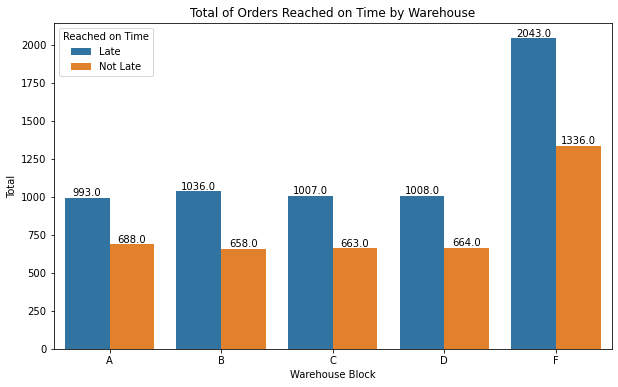

<Figure size 432x288 with 0 Axes>

In [30]:
# Create a clustered column chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Warehouse Block', y='Total', hue='Reached on Time', data=late)


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height() + 0),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')


# Customize the plot
plt.title("Total of Orders Reached on Time by Warehouse")
plt.xlabel("Warehouse Block")
plt.ylabel("Total")
plt.legend(title='Reached on Time')

# Show the plot
plt.show()
plt.savefig("Gambar.png")

In [31]:

#menyeleksi kolom feature ID

df_selection = df.drop(columns = ['ID','Customer_care_calls','Customer_rating'])
df_selection.head()
     

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product_tr,...,discount_std,weight_std,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,D,Flight,177,3,0,0,44,1233,Late,-0.545244,...,1.647932,-1.468240,0,0,0,1,0,1,0,0
1,F,Flight,216,2,0,1,59,3088,Late,0.018820,...,1.918637,-0.333893,0,0,0,0,1,1,0,0
2,A,Flight,183,4,0,1,48,3374,Late,-0.448692,...,1.728227,-0.159002,1,0,0,0,0,1,0,0
3,B,Flight,176,4,1,1,10,1177,Late,-0.562796,...,0.280688,-1.502484,0,1,0,0,0,1,0,0
4,C,Flight,184,3,1,0,46,2484,Late,-0.432104,...,1.688952,-0.703244,0,0,1,0,0,1,0,0


In [32]:
#memgekstraksi antara feature Cost dengan Weight (cost per weight)
#mengekstraksi antara feature Cost_Product dengan Diskon yang ditawarkan. jadi terlihat cost sebelum dan sesudah diskon 

df_selection['Cost_Per_Weight'] = (df_selection['Cost_of_the_Product'] / df_selection['Weight_in_gms'])
df_selection['Cost_After_Disc'] = (df_selection['Cost_of_the_Product'] - df_selection['Discount_offered'])

In [33]:
#mengekstrasi Level Weight
def segment(x):
    if x['Weight_in_gms'] < 3634:
        segment = 'Low'
    elif x['Weight_in_gms'] <= 5846:
        segment = 'Mid'
    elif x['Weight_in_gms'] >= 5846:
        segment = 'High'
    return segment

df_selection['Weight_level'] = df_selection.apply(lambda x: segment(x), axis=1)
df_selection.head()

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product_tr,...,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Cost_Per_Weight,Cost_After_Disc,Weight_level
0,D,Flight,177,3,0,0,44,1233,Late,-0.545244,...,0,0,1,0,1,0,0,0.143552,133,Low
1,F,Flight,216,2,0,1,59,3088,Late,0.018820,...,0,0,0,1,1,0,0,0.069948,157,Low
2,A,Flight,183,4,0,1,48,3374,Late,-0.448692,...,0,0,0,0,1,0,0,0.054238,135,Low
3,B,Flight,176,4,1,1,10,1177,Late,-0.562796,...,1,0,0,0,1,0,0,0.149533,166,Low
4,C,Flight,184,3,1,0,46,2484,Late,-0.432104,...,0,1,0,0,1,0,0,0.074074,138,Low


In [34]:

df_selection.info()
     


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10096 entries, 0 to 10998
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Warehouse_block          10096 non-null  object 
 1   Mode_of_Shipment         10096 non-null  object 
 2   Cost_of_the_Product      10096 non-null  int64  
 3   Prior_purchases          10096 non-null  int64  
 4   Product_importance       10096 non-null  int64  
 5   Gender                   10096 non-null  int64  
 6   Discount_offered         10096 non-null  int64  
 7   Weight_in_gms            10096 non-null  int64  
 8   Reached.on.Time_Y.N      10096 non-null  object 
 9   Cost_of_the_Product_tr   10096 non-null  float64
 10  Discount_offered_tr      10096 non-null  float64
 11  Customer_care_calls_tr   10096 non-null  float64
 12  Weight_in_gms_tr         10096 non-null  float64
 13  Prior_purchases_tr       10096 non-null  float64
 14  Discount_offered_log  

In [35]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [36]:
df_selection

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product_tr,...,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Cost_Per_Weight,Cost_After_Disc,Weight_level
0,D,Flight,177,3,0,0,44,1233,Late,-0.545244,...,0,0,1,0,1,0,0,0.143552,133,Low
1,F,Flight,216,2,0,1,59,3088,Late,0.018820,...,0,0,0,1,1,0,0,0.069948,157,Low
2,A,Flight,183,4,0,1,48,3374,Late,-0.448692,...,0,0,0,0,1,0,0,0.054238,135,Low
3,B,Flight,176,4,1,1,10,1177,Late,-0.562796,...,1,0,0,0,1,0,0,0.149533,166,Low
4,C,Flight,184,3,1,0,46,2484,Late,-0.432104,...,0,1,0,0,1,0,0,0.074074,138,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,D,Ship,236,5,1,1,3,1906,Not Late,0.346817,...,0,0,1,0,0,0,1,0.123820,233,Low
10995,B,Ship,232,5,1,0,6,1247,Not Late,0.275694,...,1,0,0,0,0,0,1,0.186047,226,Low
10996,C,Ship,242,5,0,0,4,1155,Not Late,0.464007,...,0,1,0,0,0,0,1,0.209524,238,Low
10997,F,Ship,223,6,1,1,2,1210,Not Late,0.123259,...,0,0,0,1,0,0,1,0.184298,221,Low


In [37]:
def segment(x):
    if x['Reached.on.Time_Y.N'] == 'Late':
        segment = 1
    else :
        segment = 0
    return segment

df['Reached.on.Time_Y.N'] = df.apply(lambda x: segment(x), axis=1)


In [38]:
df_ML = df_selection.drop(['Warehouse_block', 'Weight_level', 'Mode_of_Shipment'], axis=1)

In [39]:
def segment(x):
    if x['Reached.on.Time_Y.N'] == 'Late':
        segment = 1
    else :
        segment = 0
    return segment

df_ML['Reached.on.Time_Y.N'] = df_ML.apply(lambda x: segment(x), axis=1)


In [40]:
df_ML.sample(5)

,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product_tr,Discount_offered_tr,Customer_care_calls_tr,...,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Cost_Per_Weight,Cost_After_Disc
7102,275,5,0,0,10,1924,0,1.550085,0.583496,0.771450,...,0,0,1,0,0,0,1,0,0.142931,265
8954,271,5,0,1,5,4880,0,1.349498,-0.408805,-0.826698,...,1,0,0,0,0,0,0,1,0.055533,266
2120,177,2,0,1,14,1735,1,-0.545244,0.758004,0.771450,...,1,0,0,0,0,0,0,1,0.102017,163
912,161,3,0,0,6,1386,1,-0.840906,-0.211070,0.031369,...,0,0,0,1,0,0,0,1,0.116162,155
6272,279,4,0,1,7,1447,0,1.644369,-0.017565,1.486537,...,1,0,0,0,0,0,0,1,0.192813,272


In [41]:
# pengelompokan kolom berdasarkan jenis preprocessing
df_quantile_lr = df_ML.drop(columns = ['product_cost_std','prior_purchase_std','discount_std','weight_std'])

df_log_lr = df_ML.drop(columns = ['Cost_of_the_Product_tr','Discount_offered_tr','Weight_in_gms_tr','Prior_purchases_tr'])

In [42]:
# split data
X_qlr = df_quantile_lr.drop(columns=['Reached.on.Time_Y.N'])
y_qlr = df_quantile_lr[['Reached.on.Time_Y.N']]

X_qlr_train, X_qlr_test, y_qlr_train, y_qlr_test = train_test_split(X_qlr, y_qlr, test_size=0.3, random_state=42,stratify=y_qlr)

In [43]:
df_quantile_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10096 entries, 0 to 10998
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cost_of_the_Product      10096 non-null  int64  
 1   Prior_purchases          10096 non-null  int64  
 2   Product_importance       10096 non-null  int64  
 3   Gender                   10096 non-null  int64  
 4   Discount_offered         10096 non-null  int64  
 5   Weight_in_gms            10096 non-null  int64  
 6   Reached.on.Time_Y.N      10096 non-null  int64  
 7   Cost_of_the_Product_tr   10096 non-null  float64
 8   Discount_offered_tr      10096 non-null  float64
 9   Customer_care_calls_tr   10096 non-null  float64
 10  Weight_in_gms_tr         10096 non-null  float64
 11  Prior_purchases_tr       10096 non-null  float64
 12  Discount_offered_log     10096 non-null  float64
 13  Prior_purchases_log      10096 non-null  float64
 14  cust_call_std         

In [44]:
def model_eval(clf, pred, xtrain, ytrain, xtest, ytest, ypredproba, ypredtrainproba):
    print("Score: ", round(clf.score(xtest, ytest),2))
    print("Accuracy (Test Set): ", round(accuracy_score(ytest, pred),2))
    print("Precision (Test Set): ", round(precision_score(ytest, pred),2))
    print("Recall (Test Set): ", round(recall_score(ytest, pred),2))
    print("F1-Score (Test Set): ", round(f1_score(ytest, pred),2))
    print('roc-auc (test-proba): ', round(roc_auc_score(ytest, ypredproba[:,1]),2))
    print('roc-auc (train-proba): ', round(roc_auc_score(ytrain, ypredtrainproba[:,1]),2))   

In [45]:
hyperparameterqlr = {'penalty':['l1', 'l2'],
                    'C':[0.0001, 0.001, 0.1, 0.02, 0.03, 0.01],
                    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

quantile_lr = RandomizedSearchCV(LogisticRegression(random_state=42), hyperparameterqlr, cv=5, scoring='roc_auc')
quantile_lr.fit(X_qlr_train, y_qlr_train)

y_qlr_pred = quantile_lr.predict(X_qlr_test)
y_qlr_pred_proba = quantile_lr.predict_proba(X_qlr_test)
y_qlr_pred_train = quantile_lr.predict(X_qlr_train)
y_qlr_pred_train_proba = quantile_lr.predict_proba(X_qlr_train)

model_eval(quantile_lr, y_qlr_pred, X_qlr_train, y_qlr_train, X_qlr_test, y_qlr_test, y_qlr_pred_proba, y_qlr_pred_train_proba)
print('      ')
hpqlr = list(hyperparameterqlr)
for i in hpqlr:
    print('Best',i,':', quantile_lr.best_estimator_.get_params()[i])

Score:  0.73
Accuracy (Test Set):  0.65
Precision (Test Set):  0.73
Recall (Test Set):  0.66
F1-Score (Test Set):  0.69
roc-auc (test-proba):  0.73
roc-auc (train-proba):  0.74
      
Best penalty : l2
Best C : 0.01
Best solver : newton-cg


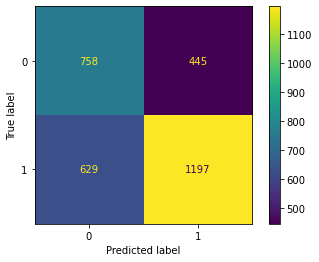

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(quantile_lr, X_qlr_test, y_qlr_test)

In [47]:
X_llr = df_log_lr.drop(columns=['Reached.on.Time_Y.N'])
y_llr = df_log_lr[['Reached.on.Time_Y.N']]

X_llr_train, X_llr_test, y_llr_train, y_llr_test = train_test_split(X_llr, y_llr, test_size=0.3, random_state=42,stratify=y_llr)

In [48]:
hyperparameterllr = {'penalty':['l1', 'l2'],
                    'C':[0.0001, 0.001, 0.1, 0.02, 0.03, 0.01],
                    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_lr = RandomizedSearchCV(LogisticRegression(random_state=42), hyperparameterllr, cv=5, scoring='roc_auc')
log_lr.fit(X_llr_train, y_llr_train)

y_llr_pred = log_lr.predict(X_llr_test)
y_llr_pred_proba = log_lr.predict_proba(X_llr_test)
y_llr_pred_train = log_lr.predict(X_llr_train)
y_llr_pred_train_proba = log_lr.predict_proba(X_llr_train)

model_eval(log_lr, y_llr_pred, X_llr_train, y_llr_train, X_llr_test, y_llr_test, y_llr_pred_proba, y_llr_pred_train_proba)
print('      ')
hpllr = list(hyperparameterllr)
for i in hpllr:
    print('Best',i,':', log_lr.best_estimator_.get_params()[i])

Score:  0.73
Accuracy (Test Set):  0.65
Precision (Test Set):  0.71
Recall (Test Set):  0.71
F1-Score (Test Set):  0.71
roc-auc (test-proba):  0.73
roc-auc (train-proba):  0.73
      
Best penalty : l2
Best C : 0.02
Best solver : saga


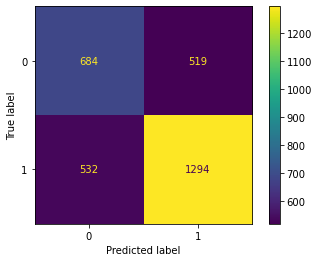

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_lr, X_llr_test, y_llr_test)

In [50]:
X_q = df_quantile_lr.drop(columns=['Reached.on.Time_Y.N'])
y_q = df_quantile_lr[['Reached.on.Time_Y.N']]

X_q_train, X_q_test, y_q_train, y_q_test = train_test_split(X_q, y_q, test_size=0.3, random_state=42,stratify=y_q)

In [51]:
# LogisticRegression Hyperparameter Tuning
hyperparameterlr = {'penalty' : ['l1', 'l2'],
                    'C' : [0.0001, 0.001, 0.1, 0.02, 0.03, 0.01], 
                    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                   }

# DesicionTree Hyperparameter Tuning
hyperparameterdt = {'max_depth' : [int(x) for x in np.linspace(1, 100, num = 30)], # Maximum number of levels in tree, 
                    'min_samples_split' : [2, 5, 10, 100], # Minimum number of samples required to split a node, 
                    'min_samples_leaf' : [1, 2, 4, 10, 20, 50], # Minimum number of samples required at each leaf node,
                    'max_features' : ['auto', 'sqrt','log2'] # Number of features to consider at every split
                    }

# RandomForest Hyperparameter Tuning
hyperparameterrf = {'n_estimators' : [int(x) for x in np.linspace(1, 10, num = 10)],
                    'max_depth' : [int(x) for x in np.linspace(1, 10, num = 3)], # Maximum number of levels in tree
                    'min_samples_split' : [int(x) for x in np.linspace(1, 40, num = 30)], # Minimum number of samples required to split a node
                    'min_samples_leaf' : [int(x) for x in np.linspace(1, 20, num = 30)], # Minimum number of samples required at each leaf node
                    'max_features' : ['auto', 'sqrt','log2'], # Number of features to consider at every split
                    'criterion' : ['gini', 'entropy']
                   }

# K-Nearest Neighbors Hyperparameter Tuning]
hyperparameterkn = {'leaf_size' : list(range(1,50)),
                    'n_neighbors' : list(range(1,30)),
                    'p' : [1,2]
                   }

# Gaussian Naive Bayes Hyperparameter Tuning
hyperparameterNB = {'var_smoothing' : [int(x) for x in np.linspace(0,100, num=10)] 
                   }

# Gradient Boosting hyperparameter Tuning
hyperparametergb = {'n_estimators' : [2,6,8,10],
                    'max_depth' : [int(x) for x in np.linspace(1, 100, num = 5)], # Maximum number of levels in tree
                    'learning_rate' : [0.01,0.1,1,10]
                   }


# XGBoost hyperparameter Tuning
hyperparameterxgb = {'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
                    'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
                    'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
                    'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)],
                    }

In [52]:
models = {
    "K-Nearest Neighbors tuned": RandomizedSearchCV(KNeighborsClassifier(), hyperparameterkn, cv=5, scoring='roc_auc'),
    "Decision Tree tuned": RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), hyperparameterdt, cv=5, scoring='roc_auc'),
    "Random Forest tuned": RandomizedSearchCV(RandomForestClassifier(random_state = 42), hyperparameterrf, cv=5, scoring='roc_auc'),
    "Gradient Boosting tuned": RandomizedSearchCV(GradientBoostingClassifier(random_state = 42), hyperparametergb, cv=5, scoring='roc_auc'),
    "Gaussian Naive Bayes tuned": RandomizedSearchCV(GaussianNB(), hyperparameterNB, cv=5, verbose=1, scoring='roc_auc'),
    "XGboost tuned": RandomizedSearchCV(XGBClassifier(random_state = 42), hyperparametergb, cv=5, scoring='roc_auc')
}

K-Nearest Neighbors tuned
          
Score:  0.74
Accuracy (Test Set):  0.67
Precision (Test Set):  0.81
Recall (Test Set):  0.58
F1-Score (Test Set):  0.68
roc-auc (test-proba):  0.74
roc-auc (train-proba):  0.8
          
Best Parameters Tuned:
{'p': 2, 'n_neighbors': 26, 'leaf_size': 38}
          
Decision Tree tuned
          
Score:  0.74
Accuracy (Test Set):  0.66
Precision (Test Set):  0.75
Recall (Test Set):  0.64
F1-Score (Test Set):  0.69
roc-auc (test-proba):  0.74
roc-auc (train-proba):  0.83
          
Best Parameters Tuned:
{'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 69}
          
Random Forest tuned
          
Score:  0.74
Accuracy (Test Set):  0.68
Precision (Test Set):  0.92
Recall (Test Set):  0.51
F1-Score (Test Set):  0.65
roc-auc (test-proba):  0.74
roc-auc (train-proba):  0.79
          
Best Parameters Tuned:
{'n_estimators': 6, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'cri

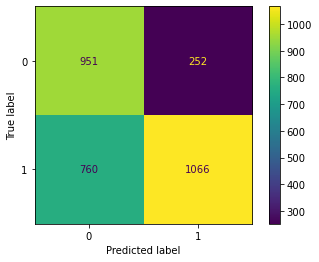

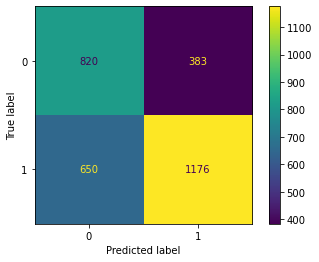

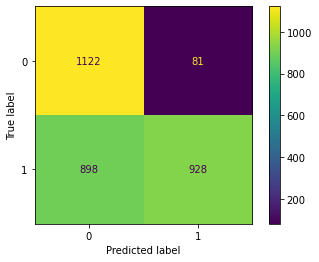

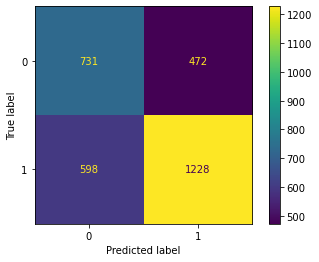

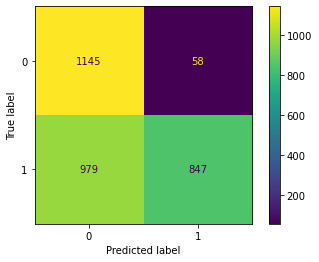

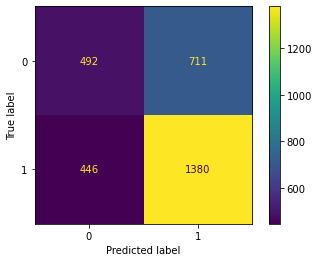

In [54]:
for name, model in models.items():
    model.fit(X_q_train, y_q_train)
    y_q_pred = model.predict(X_q_test)
    y_q_pred_proba = model.predict_proba(X_q_test)
    y_q_pred_train = model.predict(X_q_train)
    y_q_pred_train_proba = model.predict_proba(X_q_train)
    print(name)
    print('          ')
    model_eval(model, y_q_pred, X_q_train, y_q_train, X_q_test, y_q_test, y_q_pred_proba, y_q_pred_train_proba)
    print('          ')
    best_params_rf = models[name].best_params_
    print("Best Parameters Tuned:")
    print(best_params_rf)
    plot_confusion_matrix(model, X_q_test, y_q_test)
    print('==========================================================')
    print('          ')
